<a href="https://colab.research.google.com/github/ConanOReilly/Final_Year_Project/blob/main/Metadata/ModelComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Model Comparison**
From the baseline model evaluations, the data appeared to be imbalanced, underampling was used to balance the data.

Six different models were used:


*   Logistic Regression.
*   Decision Tree.
*   Random Forest.
*   XGBoost.
*   SVM.

Hyperparameter optimisation was performed through grid search for XGboost and Random Forest (Best Performing Models).

A SHAP summary graph was plotted to enhance explainability.


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Libraries**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

# **Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Year Project/Data/PAD/Metadata/Metadataoversampled.csv')

In [ ]:
df.head(3).transpose()

,0,1,2
age,8,55,77
fitspatrick,2,3,2
diameter_1,11,6,11
diameter_2,8,5,8
biopsed,0,1,0
...,...,...,...
diagnostic_BCC,0,1,0
diagnostic_MEL,0,0,0
diagnostic_NEV,1,0,0
diagnostic_SCC,0,0,0


In [ ]:
df.shape

(5070, 62)

In [ ]:
print(df.isnull().sum())

age               0
fitspatrick       0
diameter_1        0
diameter_2        0
biopsed           0
                 ..
diagnostic_BCC    0
diagnostic_MEL    0
diagnostic_NEV    0
diagnostic_SCC    0
diagnostic_SEK    0
Length: 62, dtype: int64


In [ ]:
# Reverse 'diagnostic_' columns
diagnostic_columns = [col for col in df.columns if col.startswith("diagnostic_")]
df["diagnostic"] = df[diagnostic_columns].idxmax(axis=1).str.replace("diagnostic_", "")

# Drop one-hot columns
df = df.drop(columns=diagnostic_columns)

In [ ]:
label_encoder = LabelEncoder()
df["diagnostic"] = label_encoder.fit_transform(df["diagnostic"])

In [ ]:
print(df["diagnostic"].isnull().sum())

0


In [ ]:
# Ensuring no misalignment
df = df.reset_index(drop=True)

# Separate features
y = df['diagnostic']
X = df.drop(columns=['diagnostic'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardise features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(y_test.isnull().sum())

0


# **Logistic Regression**

In [ ]:
# Train Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predict probabilities
y_probs = logistic_regression_model.predict_proba(X_test)[:, 1]

# Making predictions
y_pred = logistic_regression_model.predict(X_test)

# Print evaluation metrics
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72       169
           1       0.64      0.64      0.64       169
           2       0.93      0.97      0.95       169
           3       0.83      0.86      0.84       169
           4       0.60      0.66      0.63       169
           5       0.81      0.76      0.78       169

    accuracy                           0.76      1014
   macro avg       0.76      0.76      0.76      1014
weighted avg       0.76      0.76      0.76      1014



# **Decision Treet**

In [ ]:
# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict probabilities
y_probs = decision_tree_model.predict_proba(X_test)[:, 1]

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Print evaluation metrics
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       169
           1       0.93      0.81      0.87       169
           2       0.99      1.00      0.99       169
           3       0.98      0.98      0.98       169
           4       0.91      1.00      0.95       169
           5       0.95      0.94      0.95       169

    accuracy                           0.94      1014
   macro avg       0.94      0.94      0.94      1014
weighted avg       0.94      0.94      0.94      1014



# **Random Forest**

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict labels
y_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       169
           1       0.96      0.91      0.93       169
           2       1.00      1.00      1.00       169
           3       0.98      0.99      0.98       169
           4       0.97      1.00      0.98       169
           5       0.98      0.96      0.97       169

    accuracy                           0.97      1014
   macro avg       0.97      0.97      0.97      1014
weighted avg       0.97      0.97      0.97      1014



# **SVM**

In [ ]:
# Train SVM model
svm_model = SVC(probability=True, kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

# Predict labels
y_pred = svm_model.predict(X_test)

# Print evaluation metrics
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       169
           1       0.81      0.82      0.82       169
           2       0.98      1.00      0.99       169
           3       0.91      0.90      0.90       169
           4       0.80      0.91      0.85       169
           5       0.86      0.78      0.82       169

    accuracy                           0.86      1014
   macro avg       0.87      0.86      0.86      1014
weighted avg       0.87      0.86      0.86      1014



# **XGBoost**

In [ ]:
# Train XGBoost model
xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predict labels
y_pred = xgb_model.predict(X_test)

# Print evaluation metrics
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       169
           1       0.99      0.88      0.93       169
           2       0.99      1.00      1.00       169
           3       0.98      0.97      0.97       169
           4       0.92      1.00      0.96       169
           5       0.94      0.95      0.95       169

    accuracy                           0.96      1014
   macro avg       0.96      0.96      0.96      1014
weighted avg       0.96      0.96      0.96      1014



# **Hyperparameter Tuning**

**Grid Search**

In [ ]:
# Grid search for XGBoost
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6, None],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_search = GridSearchCV(XGBClassifier(eval_metric="mlogloss"), param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, None],
                         'n_estimators': [100, 300]})

In [ ]:
# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300}


In [ ]:
# Calling best parameters
best_xgb = XGBClassifier(learning_rate=0.3, max_depth=6, n_estimators=100, eval_metric="mlogloss", random_state=42)
best_xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_xgb.predict(X_test)
print("\nOptimized XGBoost Classification Report:\n", classification_report(y_test, y_pred))


Optimized XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       169
           1       0.99      0.88      0.93       169
           2       0.99      1.00      1.00       169
           3       0.98      0.97      0.97       169
           4       0.92      1.00      0.96       169
           5       0.94      0.95      0.95       169

    accuracy                           0.96      1014
   macro avg       0.96      0.96      0.96      1014
weighted avg       0.96      0.96      0.96      1014



In [ ]:
# Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialise the model
rf = RandomForestClassifier(random_state=42)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Train the model with the best hyperparameters
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
print("\nOptimized Random Forest Classification Report:\n", classification_report(y_test, y_pred))


Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       169
           1       0.95      0.95      0.95       169
           2       1.00      1.00      1.00       169
           3       0.98      0.99      0.99       169
           4       0.97      1.00      0.98       169
           5       0.98      0.97      0.98       169

    accuracy                           0.97      1014
   macro avg       0.97      0.97      0.97      1014
weighted avg       0.97      0.97      0.97      1014



# **AUC-ROC Curves**

**XGBoost**

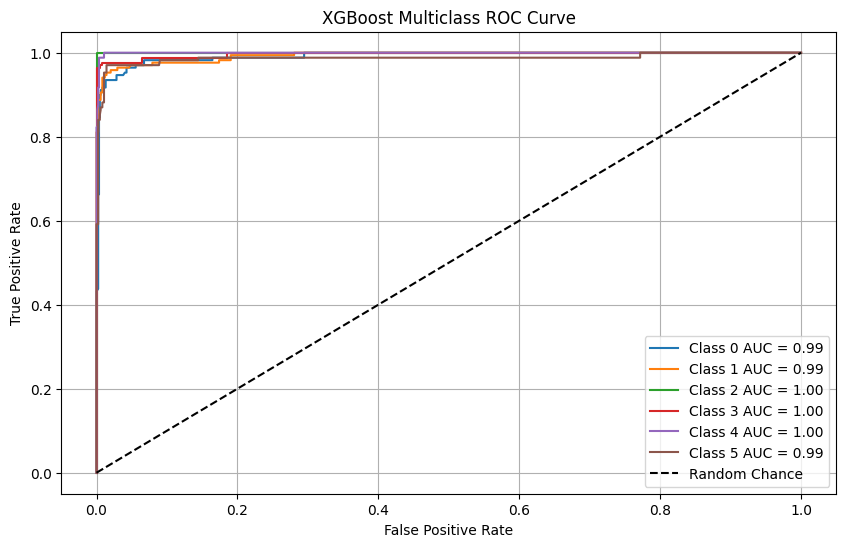

In [ ]:
# Binarise the labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get probability predictions from the best models
y_probs_rf = best_rf.predict_proba(X_test)
y_probs_xgb = best_xgb.predict_proba(X_test)

# Plot ROC Curve for each class
plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin[:, i], y_probs_xgb[:, i])
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

    plt.plot(fpr_xgb, tpr_xgb, linestyle='-', label=f"Class {i} AUC = {roc_auc_xgb:.2f}")

plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Random Forest**

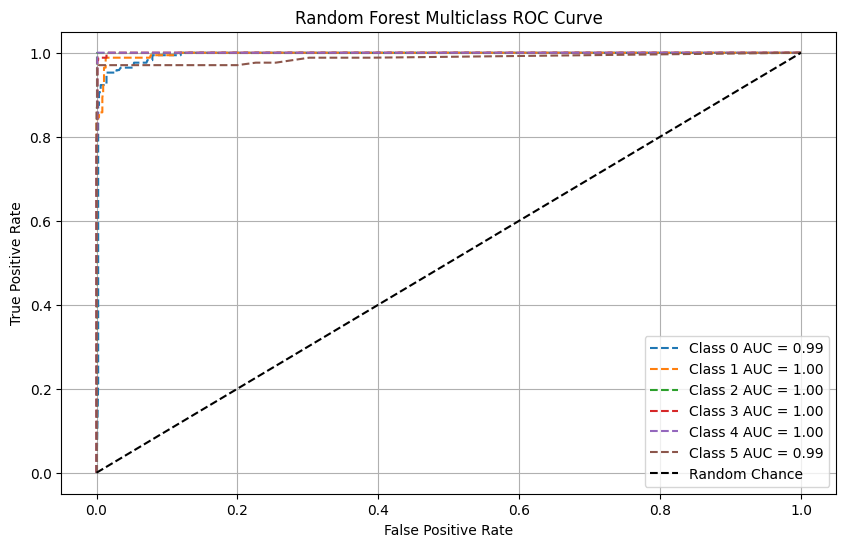

In [ ]:
plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, i], y_probs_rf[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    plt.plot(fpr_rf, tpr_rf, linestyle='--', label=f"Class {i} AUC = {roc_auc_rf:.2f}")

plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **SHAP**

In [ ]:
!pip install shap

<Figure size 1000x600 with 0 Axes>

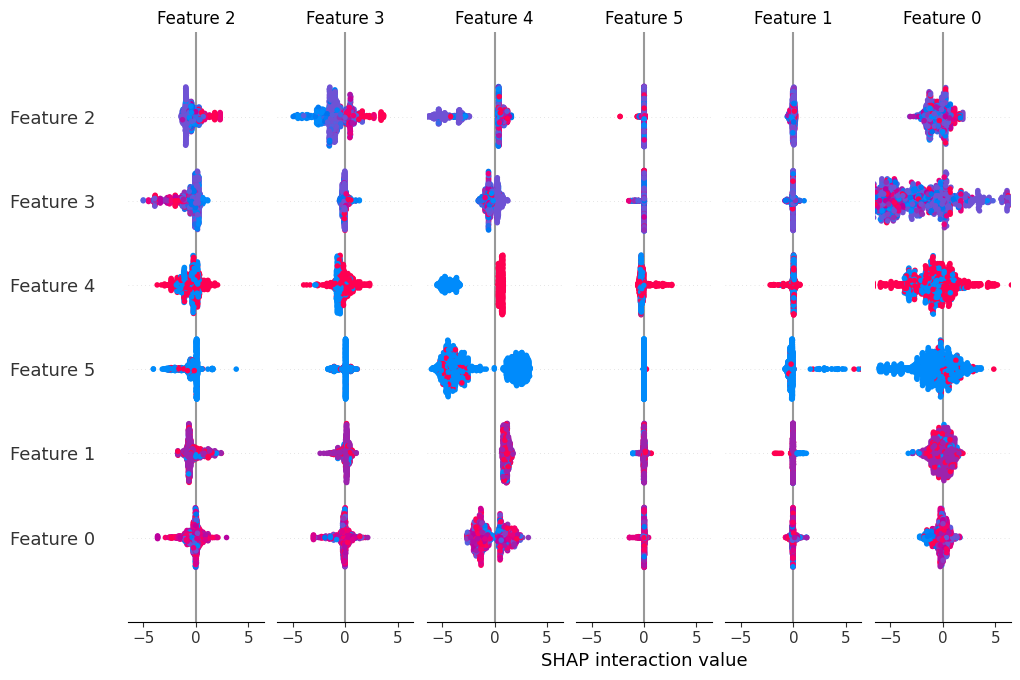

In [ ]:
# Initialise SHAP
explainer_xgb = shap.Explainer(best_xgb)
shap_values_xgb = explainer_xgb(X_test)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_xgb, X_test, plot_type="dot", show=True)